# Solving Optimization Problems with Python

The `scipy.optimize.least_squares` function in Python is a powerful tool for solving optimization problems. It provides a range of algorithms to minimize scalar functions of one or more variables. This tutorial will guide you through the process of using `least_squares` to solve optimization problems step-by-step.

For more details, check the official [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html).

## Prerequisites

Make sure you have `scipy` installed. If not, you can install it using pip:

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Required Modules

Start by importing the necessary libraries:

In [2]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

## Step 2: Define the Objective Function

Define the function you want to minimize. For example, let's minimize the following quadratic function:

$$
    f(x) = (x - 3)^2 + 4
$$

Here is the corresponding Python code:

In [3]:
def objective_function(x):
    return (x - 3)**2 + 4

### Visualizing the Function

Before running the optimization, it's often helpful to visualize the function. You can use `matplotlib` to plot the function over a range of values:

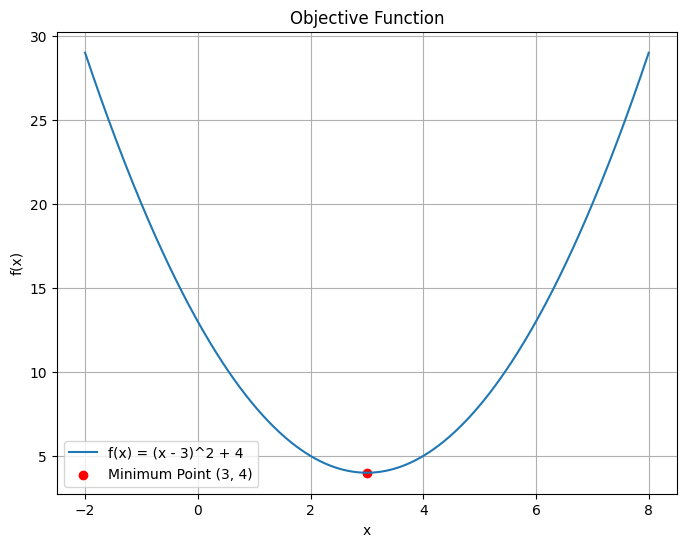

In [4]:
# Define a range of x values
x = np.linspace(-2, 8, 500)
y = (x - 3)**2 + 4

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = (x - 3)^2 + 4")
plt.scatter(3, 4, color='red', label="Minimum Point (3, 4)")
plt.title("Objective Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

## Step 3: Set an Initial Guess

Provide an initial guess for the solution. This is a required parameter for `least_squares`.

In [7]:
initial_guess = [0]  # Starting point for the optimization

## Step 4: Call the `least_squares` Function

Use the `least_squares` function to solve the optimization problem.

In [8]:
result = least_squares(objective_function, initial_guess)
result

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.000e+00]
           x: [ 3.000e+00]
        cost: 8.0
         jac: [[ 3.974e-08]]
        grad: [ 1.589e-07]
  optimality: 1.5894571940104166e-07
 active_mask: [ 0.000e+00]
        nfev: 17
        njev: 3

The output of `scipy.optimize.least_squares` provides information about the optimization process and the final solution found. Here’s what each field means in your output:

1. **`xtol` termination condition is satisfied.**
   - This means the optimization stopped because the change in the solution `x` was below the tolerance (`xtol`). The optimizer considers the solution sufficiently accurate.

2. **`success: True`**
   - The optimization was successful, meaning it found a solution within the given tolerances.

3. **`status: 3`**
   - The termination reason:
     - `1`: Stopped because `gtol` (gradient tolerance) was met.
     - `2`: Stopped because `ftol` (cost function tolerance) was met.
     - `3`: Stopped because `xtol` (change in `x` was small enough) was met.
     - Our case: `status = 3` → the solution changed very little between iterations.

4. **`fun: [ 4.000e+00]`**
   - The residual (difference between the function's output and the expected value). In our case, the function value at the final solution is `4.0`.

5. **`x: [ 3.000e+00]`**
   - The optimal parameter found: `x = 3.0`.

6. **`cost: 8.0`**
   - The sum of squared residuals: `cost = 0.5 * ||fun||² = 0.5 * (4²) = 8.0`.

7. **`jac: [[ 3.974e-08]]`**
   - The Jacobian matrix at the solution, representing the rate of change of the function with respect to `x`.

8. **`grad: [ 1.589e-07]`**
   - The gradient of the cost function at `x = 3.0`. This is very small, indicating that we are near a local minimum.

9. **`optimality: 1.5894571940104166e-07`**
   - This is the norm of the gradient, which is close to zero, meaning the solution is near an optimal point.

10. **`active_mask: [ 0.000e+00]`**
    - Indicates constraints on the variables. A value of `0` means that no constraints are active at the solution.

11. **`nfev: 17`**
    - The number of function evaluations during optimization (how many times the function was called).

12. **`njev: 3`**
    - The number of Jacobian evaluations (how many times the derivative was computed).


## Step 5: Analyze the Results

You can extract the optimized parameters and the minimum value of the objective function:

In [9]:
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [3.]
Minimum Value: [4.]


## Adding Constraints

`least_squares` also allows you to include constraints. For example, to add bounds or equality/inequality constraints:

### Example with Bounds

Optimization result:
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.332e-09]
           x: [ 2.000e+00]
        cost: 8.872011146726982e-19
         jac: [[-4.000e+00]]
        grad: [ 5.328e-09]
  optimality: 5.328267646382432e-09
 active_mask: [0]
        nfev: 5
        njev: 5


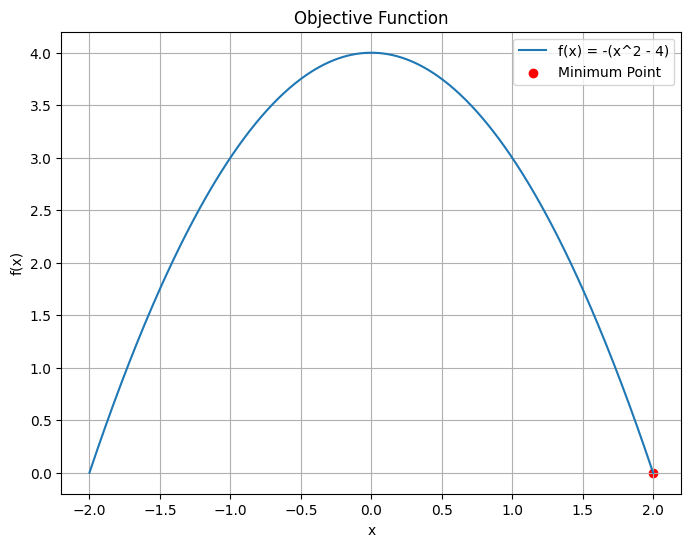

In [19]:
# Define the function we want to minimize
def func(x):
    return -(x**2 - 4)  # We want to find x such that this function is close to zero

# Set an initial guess
x0 = 1.1 

# Define the bounds: lower bound of 1, upper bound of 5
bounds = (1, 5)

# Call least_squares with bounds
result = least_squares(func, x0, bounds=bounds)

# Print results
print("Optimization result:")
print(result)

# Plot the function
x = np.linspace(-2, 2, 500)
y = -(x**2 - 4)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = -(x^2 - 4)")
plt.scatter(result.x, result.fun, color='red', label="Minimum Point")
plt.title("Objective Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()



## Minimizing a Function with Two Parameters

Consider a function with two parameters:

$$
    f(x, y) = (x - 1)^2 + (y - 2)^2
$$

This function has a minimum at $(x, y) = (1, 2)$. Here's how to minimize it:

In [20]:
def objective_function_2d(vars):
    x, y = vars
    return (x - 1)**2 + (y - 2)**2

# Initial guess
initial_guess = [0, 0]

# Perform optimization
result = least_squares(objective_function_2d, initial_guess)

# Print results
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [1.00011634 2.00023268]
Minimum Value: [6.76767219e-08]


### Visualizing the Function

For two variables, you can visualize the function as a contour plot:

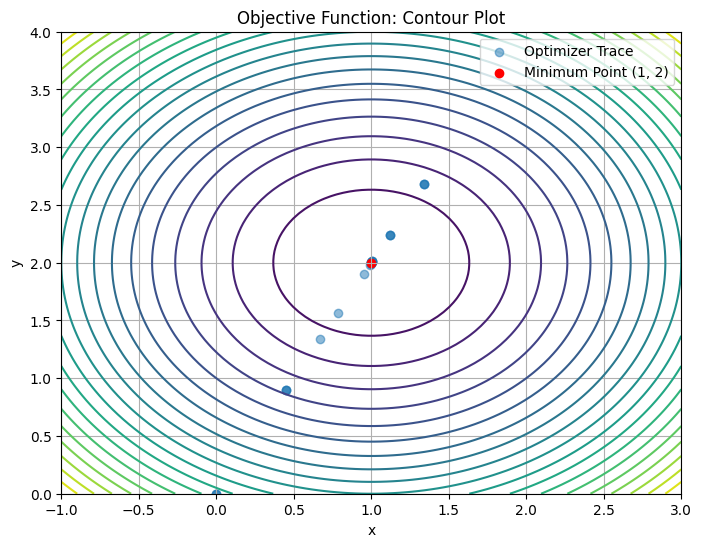

In [31]:
optimizer_trace_x = []
optimizer_trace_y = []

def objective_function_2d(vars):
    x, y = vars
    optimizer_trace_x.append(x)
    optimizer_trace_y.append(y)
    return (x - 1)**2 + (y - 2)**2

# Initial guess
initial_guess = [0, 0]

# Perform optimization
result = least_squares(objective_function_2d, initial_guess)

x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
x, y = np.meshgrid(x, y)
z = (x - 1)**2 + (y - 2)**2

plt.figure(figsize=(8, 6))
plt.contour(x, y, z, levels=20, cmap='viridis')
plt.scatter(optimizer_trace_x, optimizer_trace_y, alpha=0.5, label="Optimizer Trace")
plt.scatter(1, 2, color='red', label="Minimum Point (1, 2)")
plt.title("Objective Function: Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()